In [6]:
import chartify
data = chartify.examples.example_data()

Loading BokehJS ...

In [7]:
type(data)

pandas.core.frame.DataFrame

In [22]:
# For some reasons, this does not work
# TypeError: not supported type: <class 'numpy.str_'>
# df = spark.createDataFrame(data)

In [14]:
data.to_csv("example.csv", index=False)

In [15]:
!cat example.csv

date,country,fruit,unit_price,quantity,total_price
2017-10-21,US,Banana,0.3037114282472464,4,1.2148457129889856
2017-05-30,JP,Banana,0.2541090484203017,4,1.0164361936812067
2017-05-21,CA,Banana,0.2686347545742371,4,1.0745390182969483
2017-09-18,BR,Grape,2.21527701371842,2,4.43055402743684
2017-12-08,US,Banana,0.3083373291028292,5,1.541686645514146
2017-06-05,GB,Apple,0.8701175543437015,2,1.740235108687403
2017-09-05,JP,Banana,0.2791788319574101,7,1.954251823701871
2017-08-27,CA,Apple,1.0252648341711295,4,4.101059336684518
2017-09-14,CA,Apple,1.0788309028950054,4,4.3153236115800215
2017-05-26,GB,Grape,1.8409089481396277,2,3.6818178962792554
2017-08-01,CA,Grape,2.1062035354318187,1,2.1062035354318187
2017-07-05,BR,Apple,1.0558378642158335,2,2.111675728431667
2017-12-02,US,Orange,0.5235461716815624,5,2.617730858407812
2017-11-23,JP,Banana,0.2610017927617224,3,0.7830053782851673
2017-08-26,BR,Orange,0.5914463617438211,2,1.1828927234876423
2017-10-11,US,Orange,0.4360158341296202,4,1.7440633

In [19]:
df = spark.read.option("header", "true").option("inferSchema", "true").csv("example.csv")

In [20]:
df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- country: string (nullable = true)
 |-- fruit: string (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- total_price: double (nullable = true)



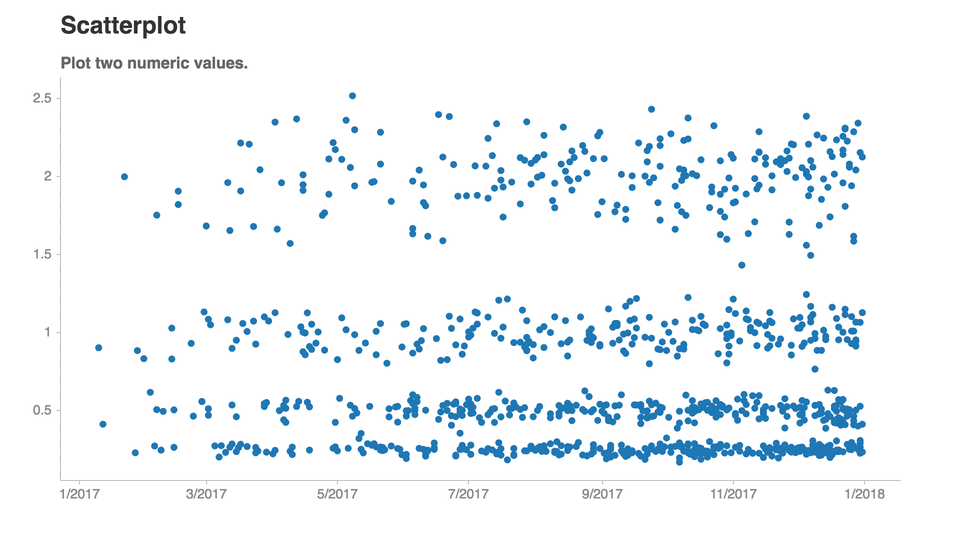

In [21]:
ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
ch.plot.scatter(
    data_frame=df.toPandas(),
    x_column='date',
    y_column='unit_price')
ch.set_title("Scatterplot")
ch.set_subtitle("Plot two numeric values.")
ch.show('png')